# Using the Quantum Teleportation Circuit Generator

In [17]:
%run QT.ipynb

In order to generate a circuit instance of the Quantum Teleportation protocol, one must first create a *QT* class instance. This class takes in 5 parameters:
1. **msg** - A list of Statevectors that represent the qubit(s) to be teleported
2. **barriers** - A boolean deciding if barriers should be included (the default value is True, and unless there is a specific reason to exclude, it is highly recommended that they remain)
3. **measure** - A boolean deciding if the teleported qubit will be measured at the end
4. **qrname** - A string that will be used to label the quantum registers ("q" is the default)
5. **crname** - A string that will be used to label the classical register holding the measured teleported qubit(s) ("output" is the default)

## Simpler, Beginner Example

For this short tutorial walkthrough, we will be teleporting a qubit with product state 1.

In [18]:
from qiskit.quantum_info import Statevector
qubit = [Statevector([0, 1])]

Now that we have prepared the qubit to be teleported, let's create the *QT* class instance.

In [19]:
QT_instance1 = QT(msg=qubit, measure=True)

From here, one must simply call the function *gen_circuit()* on their QT instance to retrieve a circuit describing the Quantum Teleportation protocol with the given qubit.

In [20]:
circuit1 = QT_instance1.gen_circuit()

We can check the circuit like so:

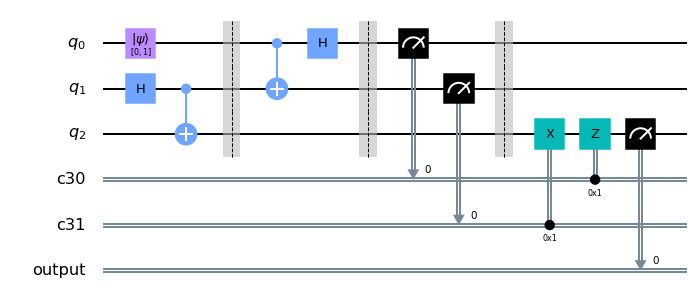

In [21]:
circuit1.draw('mpl')

Looking at the circuit, we can see that the qubit began on quantum register $q_0$. Throughout the circuit, the qubit should have been teleported to quantum register $q_2$. We can check this. At the end of the circuit, we measure the value onto the last classical register.

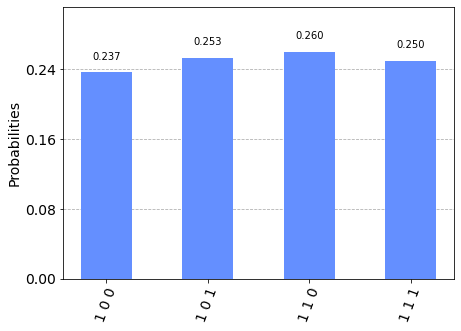

In [22]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
backend1 = Aer.get_backend('qasm_simulator')
plot_histogram(execute(circuit1, backend1, shots=1024).result().get_counts(circuit1))

The way that the circuit has been designed, all of the measured teleported qubits are placed at the last classical registers for ease of reading. So, to check if we got the result that we wanted, we need only check the last register in this case. Since we started with a Statevector that corresponded to a qubit in state 1, we know that this fucntioned correctly since a 1 in the last register occurs with 100% probability.

## Complex Example

For this short tutorial walkthrough, I will use two random Statevectors, but you could input any list of 2-dimensional Statevectors manually as well.

In [23]:
from qiskit.quantum_info import random_statevector
random_vectors = [random_statevector(2), random_statevector(2)]

These two random statevectors will be the qubits that will be teleported. Let's look at their bloch sphere representations beforehand so that we may be able to compare with the end result to confirm that the qubits are teleported.

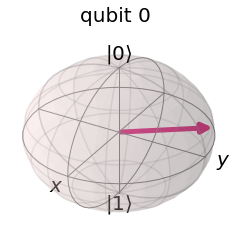

In [24]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(random_vectors[0])

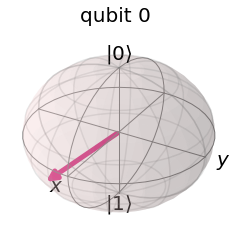

In [25]:
plot_bloch_multivector(random_vectors[1])

Now that we have the two qubits that we want to teleport, let's create the the *QT* class instance.

In [26]:
QT_instance2 = QT(msg=random_vectors, measure=False)

From here, one must simply call the function *gen_circuit()* on their QT instance to retrieve a circuit describing the Quantum Teleportation protocol with the given list of qubits.

In [27]:
circuit2 = QT_instance2.gen_circuit()

We can check the circuit like so:

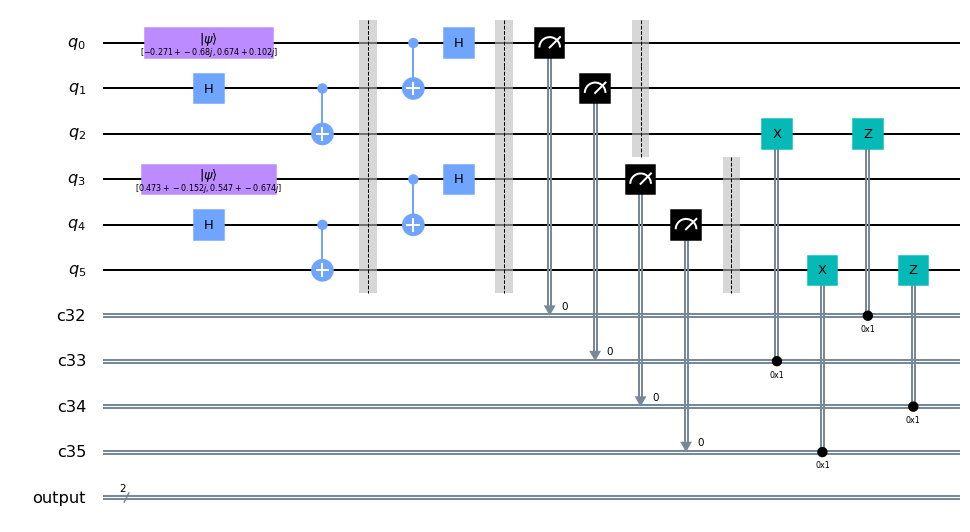

In [28]:
circuit2.draw('mpl')

Looking at the circuit, we can see that the teleported qubits started on $q_0$ and $q_3$ and ended up on registers $q_2$ and $q_5$, respectively. Finally, to check correctness, we can output the bloch sphere representations of all the qubits and compare $q_2$ and $q_5$ to the two spheres that were shown earlier.

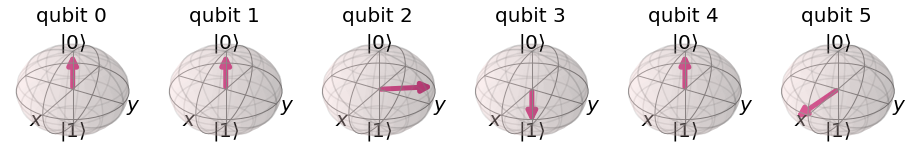

In [29]:
backend2 = Aer.get_backend('statevector_simulator')
plot_bloch_multivector(execute(circuit2, backend2).result().get_statevector())

As you can see, $q_2$ sphere matches the first bloch sphere shown earlier, and $q_5$ matches the second sphere. So we can conclude that the teleportation was completed successfully.